In [ ]:
# !pip install opencv-contrib-python

In [117]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Super Mário')

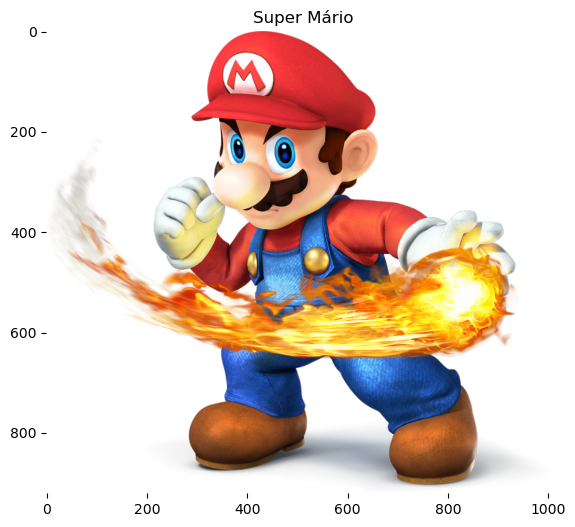

In [122]:
mario_img_plt = plt.imread("mario.png")

plt.figure(figsize=(20,6))
plt.imshow(mario_img_plt)
plt.box(False)
plt.title("Super Mário")

In [123]:
mario_img_cv2 = cv2.imread("mario.png")

#O cv2 exige que a imagem seja convertida de BGR para RGB.
mario_img_rgb = cv2.cvtColor(mario_img_cv2, cv2.COLOR_BGR2RGB)

# #Se eu quiser transformar a imagem em escala de cinza:
mario_gray_img = cv2.cvtColor(mario_img_cv2, cv2.COLOR_BGR2GRAY)

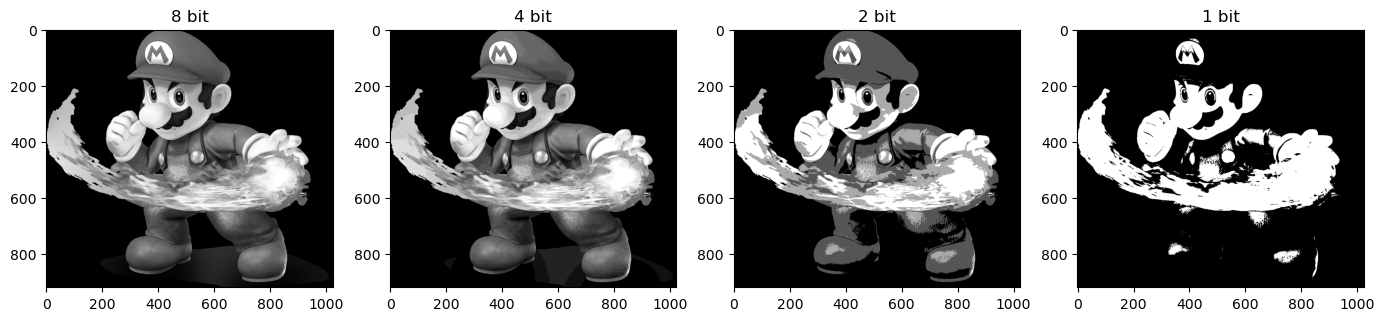

In [124]:
# aqui vamos fazer uma mostra de uma mesma imagem, variando de 8 para 1 bits, na escala cinza

mario_4_bit = np.divide(mario_gray_img, 16).astype("uint8") #transformando de 8 para 4 bits
mario_2_bit = np.divide(mario_4_bit, 4).astype("uint8") #transformando de 4 para 2 bits
mario_1_bit = np.divide(mario_2_bit, 2).astype("uint8") #transformando de 2 para 1 bits
f, ax = plt.subplots(1,4,figsize = (17,10))

ax[0].imshow(mario_gray_img, cmap="gray")
ax[0].title.set_text(f"8 bit")
ax[0].get_xaxis().set_visible(True)
ax[0].get_yaxis().set_visible(True)

ax[1].imshow(mario_4_bit, cmap="gray")
ax[1].title.set_text(f"4 bit")
ax[1].get_xaxis().set_visible(True)
ax[1].get_yaxis().set_visible(True)

ax[2].imshow(mario_2_bit, cmap="gray")
ax[2].title.set_text(f"2 bit")
ax[2].get_xaxis().set_visible(True)
ax[2].get_yaxis().set_visible(True)

ax[3].imshow(mario_1_bit, cmap="gray")
ax[3].title.set_text(f"1 bit")
ax[3].get_xaxis().set_visible(True)
ax[3].get_yaxis().set_visible(True)
plt.show()

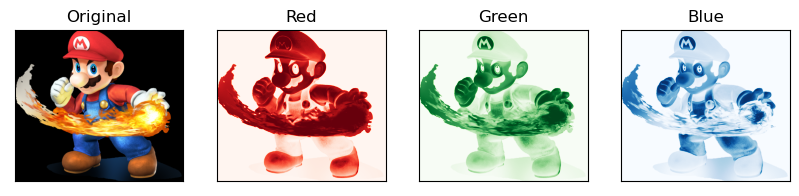

In [128]:
#Agora, separarei cada canal de cor da imagem
(mario_R, mario_G, mario_B) = cv2.split(mario_img_rgb)

#imprimindo cada canal separadamente
f, ax = plt.subplots(1, 4, figsize=(10, 5))

ax[0].imshow(mario_img_rgb)
ax[0].title.set_text("Original")
ax[0].get_xaxis().set_visible(False)
ax[0].get_yaxis().set_visible(False)

ax[1].imshow(mario_R, cmap="Reds")
ax[1].title.set_text(f"Red")
ax[1].get_xaxis().set_visible(False)
ax[1].get_yaxis().set_visible(False)

ax[2].imshow(mario_G, cmap="Greens")
ax[2].title.set_text(f"Green")
ax[2].get_xaxis().set_visible(False)
ax[2].get_yaxis().set_visible(False)

ax[3].imshow(mario_B, cmap="Blues")
ax[3].title.set_text(f"Blue")
ax[3].get_xaxis().set_visible(False)
ax[3].get_yaxis().set_visible(False)
plt.show()


In [131]:
mario_img_cv2.shape

(921, 1024, 3)

Text(0.5, 1.0, 'Super Mário Negativo')

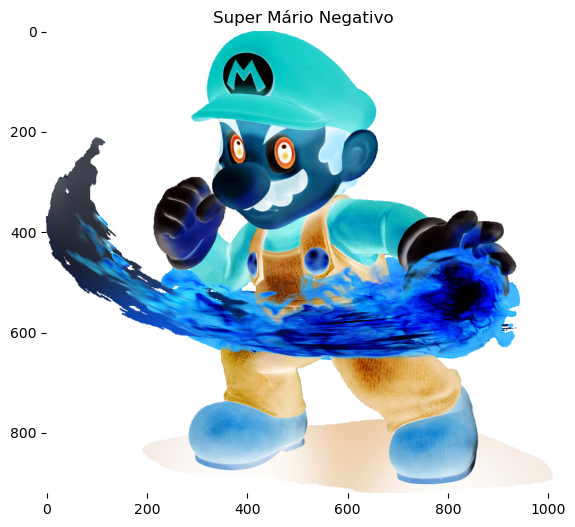

In [165]:
mario_img_rgb_inv = np.invert(mario_img_rgb)

plt.figure(figsize=(20,6))
plt.imshow(mario_img_rgb_inv)
plt.box(False)
plt.title("Super Mário Negativo")

#Esse é o negativo de uma foto. É pegar todas as cores e invertê-las, colocando as cores contrárias, cores
#"negativas"

Text(0.5, 1.0, 'Super Mário Transposto')

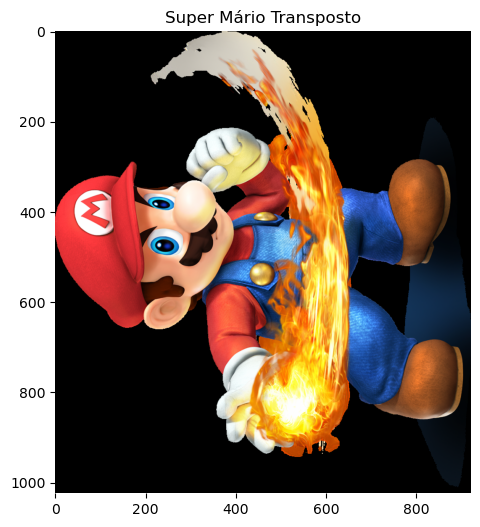

In [166]:
mario_img_rgb_transposta = np.transpose(mario_img_rgb)
mario_img_rgb_transposta = np.swapaxes(mario_img_rgb_transposta, 0, 1) #pra trocar o que é linha, pelo que é coluna
mario_img_rgb_transposta = np.swapaxes(mario_img_rgb_transposta, 1, 2) #Então, ele colocou a imagem de lado e
                                                                       # inverteu o mario pro outro lado
plt.figure(figsize=(20,6))
plt.imshow(mario_img_rgb_transposta)
plt.box(False)
plt.title("Super Mário Transposto")

In [167]:
#Podemos verificar que o shape foi invertido
mario_img_rgb_transposta.shape

(1024, 921, 3)

In [168]:
# Criando uma cópia da imagem e aplicando slices para isolar somente 1 cor
#Lembrando que a 3ª camada possui valores pro RGB, sendo o R na posição 0, o G, na 1 e o B, na 2.

R = mario_img_rgb.copy()
R[:, :, [1,2]] = 0

G = mario_img_rgb.copy()
G[:, :, [0,2]] = 0

B = mario_img_rgb.copy()
B[:, :, [0,1]] = 0

C = mario_img_rgb.copy()
C[:, :, [1,2]] = 100

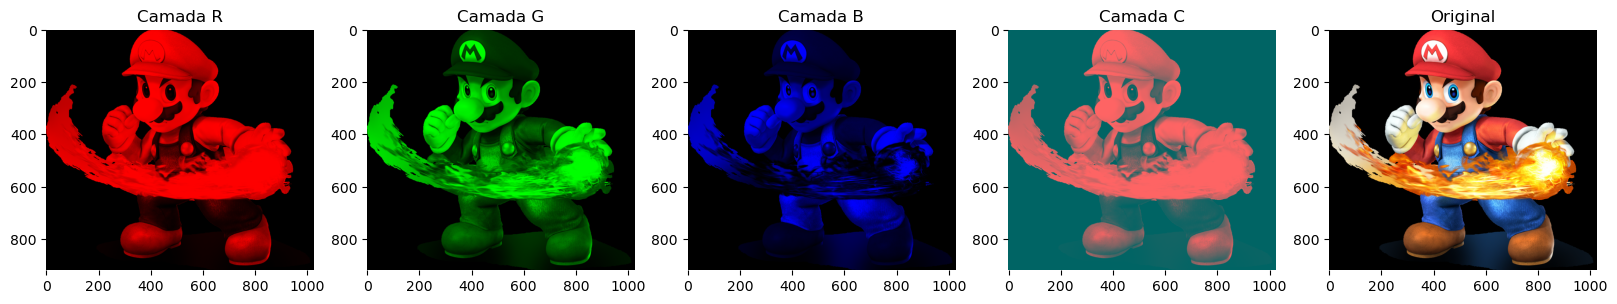

In [169]:
plt.figure(figsize=(20,6))

plt.subplot(1,5,1)
plt.title("Camada R")
plt.imshow(R)
plt.box(False)

plt.subplot(1,5,2)
plt.title("Camada G")
plt.imshow(G)
plt.box(False)

plt.subplot(1,5,3)
plt.title("Camada B")
plt.imshow(B)
plt.box(False)

plt.subplot(1,5,4)
plt.title("Camada C")
plt.imshow(C)
plt.box(False)

plt.subplot(1,5,5)
plt.title("Original")
plt.imshow(mario_img_rgb)
plt.box(False)

In [163]:
#criando filtro em cima de uma imagem
import requests
lago_url = "https://images.unsplash.com/photo-1516132006923-6cf348e5dee2?ixlib=rb-1.2.1&ixid=Mnwx"

#download da imagem:
img_data = requests.get(url=lago_url).content

#salvando a imagem na pasta local
with open("lago.png", "wb") as handler:
    handler.write(img_data)

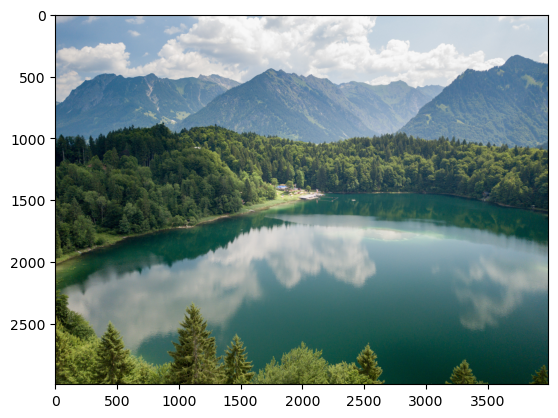

In [164]:
lago = cv2.imread("lago.png")
plt.imshow(cv2.cvtColor(lago, cv2.COLOR_BGR2RGB))

In [173]:
lago_b, lago_g, lago_r = cv2.split(lago)

subset = lago_b[0:3, 0:3]

print(subset)

#fiz uns slices pra pegar alguns valores da matriz de pixels

[[194 191 195]
 [195 193 197]
 [194 192 195]]


In [175]:
#fazer esse kernel aqui é importante no deep learning, em redes neurais convolucionais.
#Essa multiplicação entre as duas matrizes permite que cada imagem seja transformada em imagens menores, pegando
#partes pequenas e reduzindo elas
kernel = np.asarray([
    [0,0,0],
    [0,1,0],
    [0,0,0]
])

print(np.multiply(subset, kernel)) # aqui, imprimo a matriz resultante do produto

convolved = np.sum(np.multiply(subset, kernel)) #aqui, imprimo a soma de todos os valores da matriz
print(convolved)

[[  0   0   0]
 [  0 193   0]
 [  0   0   0]]
193


In [177]:
#criando uma função de convolução
def convolve_padding(img: np.array, kernel: np.array, padding: bool = True) -> np.array:

    #Para simplificar
    k = kernel.shape[0]
    if padding:
        padding_len = k//2
        img = np.pad(img,
                    ((padding_len, padding_len), (padding_len, padding_len)),
                    "constant")
        
    final_img_size = (img.shape[0]-k+1, img.shape[1]-k+1)

    rows, cols = img.shape

    #criando um array bidimensional com o tamanho da imagem final
    final_img_size = (img.shape[0]-k+1, img.shape[1]-k+1)
    convolved_img = np.zeros(shape=final_img_size)

    #iteração por linha
    for i in range(rows-k+1):
        #iteração por coluna
        for j in range(cols-k+1):
            #img[i, j] = valor do pixel
            #Pegue uma amostra da imagem
            mat = img[i:i+k, j:j+k]
            #Aplicando a convolução
            #Multiplicação por cada elemento e somando o resultado
            #Armazenando o valor na linha i na coluna j
            #evitando pixels com valores negativos
            result = np.sum(np.multiply(mat,kernel))
            if result < 0:
                result = 0
            #limitando o valor do pixel para 255
            if result > 255:
                result = 255
            #evitando pixel com float utilizando int!
            convolved_img[i,j] = int(result)
    #Voltando a imagem para 8bits
    return convolved_img.astype("uint8")    

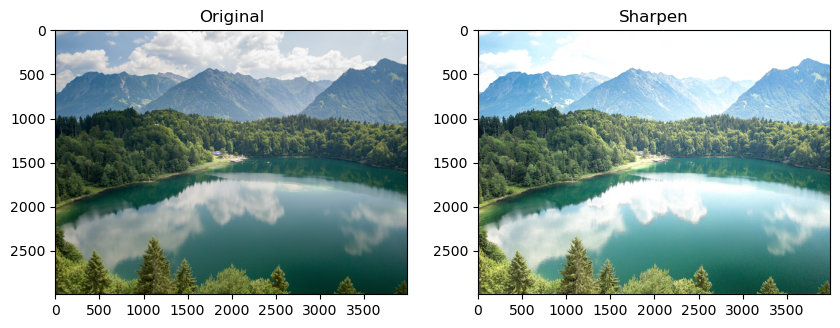

In [178]:
#Utilizando o efeito (filtro) sharpen e vou aplicar em cima da imagem
sharpen = np.array([
    [-1,-1,-1],
    [-1,9.5,-1],
    [-1,-1,-1],    
])

#aplicando o kernel de sharpen para o canal azul
lago_b_convolved = convolve_padding(lago_b, sharpen)
#aplicando o kernel de sharpen para o canal verde
lago_g_convolved = convolve_padding(lago_g, sharpen)
#aplicando o kernel de sharpen para o canal vermelho
lago_r_convolved = convolve_padding(lago_r, sharpen)

#juntando os canais em uma única imagem
lago_convolved = cv2.merge([lago_b_convolved, lago_g_convolved, lago_r_convolved])

#plotando a figura original e a convoluída
f, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].imshow(cv2.cvtColor(lago, cv2.COLOR_BGR2RGB))
ax[0].title.set_text("Original")
ax[1].imshow(cv2.cvtColor(lago_convolved, cv2.COLOR_BGR2RGB))
ax[1].title.set_text("Sharpen")